<a href="https://colab.research.google.com/github/moch1996/MachineLearningProj/blob/master/assignment_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load the Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

In [2]:
# import data with numpy
data_train = np.genfromtxt('training.txt', delimiter=',')
data_test = np.genfromtxt('testing.txt', delimiter=',')

In [3]:
data_train[0,0] = 7.609000000000000208e-01
data_test[0,0] = 1.007260000000000044e+00

In [4]:
# number of training data
n_train = data_train.shape[0]
n_test = data_test.shape[0]

In [5]:
# training data
x1_train          = data_train[:,0] # feature1
x2_train          = data_train[:,1] # feature2
y_train           = data_train[:,2][:,None] # label
idx_class0_train  = (data_train[:,2]==0) # index of class 0
idx_class1_train  = (data_train[:,2]==1) # index of class 1

In [6]:
# testing data
x1_test             = data_test[:,0] # feature 1
x2_test             = data_test[:,1] # feature 2
y_test              = data_test[:,2][:,None] # label
idx_class0_test     = (data_test[:,2]==0) # index of class0
idx_class1_test     = (data_test[:,2]==1) # index of class1

In [7]:
# Set the theta
init_theta = np.zeros((10,10))
for i in range(10) :
  for j in range(10) :
    init_theta[j,i] = random.uniform(1e-1,2e-1)

init_theta

array([[0.17443653, 0.18721317, 0.15091084, 0.18467226, 0.19483941,
        0.10711498, 0.1204896 , 0.18007328, 0.17651847, 0.14131455],
       [0.10954975, 0.1364148 , 0.1094073 , 0.1032231 , 0.11436633,
        0.15604452, 0.11242202, 0.1568184 , 0.19108286, 0.19787214],
       [0.13565558, 0.11083007, 0.13106377, 0.10426237, 0.18401078,
        0.12203556, 0.16252488, 0.14012935, 0.17393219, 0.16101599],
       [0.19148276, 0.17572193, 0.18660417, 0.11374577, 0.10471411,
        0.16261926, 0.13138631, 0.1977591 , 0.19212935, 0.10516274],
       [0.10828894, 0.18022087, 0.17336387, 0.11542787, 0.13266802,
        0.1923388 , 0.16315008, 0.15147479, 0.19621941, 0.1451592 ],
       [0.10922313, 0.17055972, 0.16228827, 0.17010525, 0.14281084,
        0.15734662, 0.13052828, 0.19159604, 0.17963392, 0.15371024],
       [0.16326438, 0.19214964, 0.13444839, 0.15210704, 0.17286821,
        0.1148309 , 0.11822231, 0.14517769, 0.19482157, 0.19357392],
       [0.16300439, 0.15651   , 0.1084899

In [8]:
theta = init_theta

In [9]:
# sigmoid function
def sigmoid(z) :
  sigmoid_f = 1 / (1+np.exp(-z))
  return sigmoid_f

In [12]:
X = np.ones((200,100))

In [13]:
for i in range(10) :
  X[:,i] = (x1_train**i) * (x2_train**0)

In [14]:
for i in range(10,20) :
  X[:,i] = (x1_train**(i-10)) * (x2_train**1)

In [15]:
for i in range(20,30) :
  X[:,i] = (x1_train**(i-20)) * (x2_train**2)

In [16]:
for i in range(30,40) :
  X[:,i] = (x1_train**(i-30)) * (x2_train**3)

In [17]:
for i in range(40,50) :
  X[:,i] = (x1_train**(i-40)) * (x2_train**4)

In [18]:
for i in range(50,60) :
  X[:,i] = (x1_train**(i-50)) * (x2_train**5)

In [19]:
for i in range(60,70) :
  X[:,i] = (x1_train**(i-60)) * (x2_train**6)

In [20]:
for i in range(70,80) :
  X[:,i] = (x1_train**(i-70)) * (x2_train**7)

In [21]:
for i in range(80,90) :
  X[:,i] = (x1_train**(i-80)) * (x2_train**8)

In [22]:
for i in range(90,100) :
  X[:,i] = (x1_train**(i-90)) * (x2_train**9)

In [23]:
X2 = np.ones((200,100))

In [186]:
k=0
for i in range(10) :
  for j in range(10) :
    X2[:,k] = (x1_test**j) * (x2_test**i)
    print(k)
    k = k+1
X2.shape

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


(200, 100)

In [25]:
X.shape

(200, 100)

In [26]:
theta=init_theta.reshape(100,-1)
theta.shape

(100, 1)

In [27]:
#real
def pls_pred(X,theta) :
  p = sigmoid(np.dot(X,theta))
  return p

In [28]:
prediction = pls_pred(X,theta)

In [29]:
#real
def pls_loss(label, pls_pred):  # cross-entropy error
    
    return np.mean(-label * np.log(pls_pred + 1e-8) - (1-label) * np.log(1 - pls_pred + 1e-8)) 


In [30]:
pls_loss(y_train,prediction)

0.3214861536675294

In [31]:
#real
def plsgrad_loss(pls_pred,label, X) :
  n = len(label)
  loss = (2 * np.dot(X.T, pls_pred - label)) / n
  return loss

In [32]:
plsgrad_loss(prediction, y_train, X).shape

(100, 1)

In [33]:
#real training
def grad_desc(X, label , theta_init, tau,lamb,iteration):

    n = len(label)
    loss_history = np.zeros(iteration)
    coef_history = np.zeros((iteration,100))
    theta2 = theta_init # initialization

    for i in range(iteration): # loop over the iterations
        y_pred =  pls_pred(X,theta2)
        grad_f =  plsgrad_loss(y_pred,label,X) # gradient of the loss  
        theta2 = (1- tau*lamb)*theta2 - tau*grad_f # update rule of gradient descent  
        loss_history[i] = pls_loss(label,y_pred) # save the current loss value
        coef_history[i,:] = theta2.T 
        
    return theta2, loss_history, coef_history

In [34]:
#real training test
def grad_desc2(X, label , theta_init, tau,lamb,iteration):

    n = len(label)
    loss_history2 = np.zeros(iteration)
    coef_history2 = np.zeros((iteration,100))
    theta3 = theta_init # initialization

    for i in range(iteration): # loop over the iterations
        y_pred =  pls_pred(X,theta3)
        grad_f =  plsgrad_loss(y_pred,label,X) # gradient of the loss  
        theta3 = (1- tau*lamb)*theta3 - tau*grad_f # update rule of gradient descent  
        loss_history2[i] = pls_loss(label,y_pred) # save the current loss value
        coef_history2[i,:] = theta3.T 
        
    return theta3, loss_history2, coef_history2

In [106]:
# run gradient descent algorithm TRAINING
start = time.time()
w_init = np.zeros(10)[:,None]
tau = 1
iteration = 4000
lamb = 1e-4
theta2, loss_history, coef_history = grad_desc(X, y_train , theta, tau, lamb, iteration)

print('TIME=',time.time()-start)
print(loss_history[-1])
#print(coef_history[-1].reshape(100,1))

TIME= 0.34517550468444824
0.06810584079269301


In [107]:
# run gradient descent algorithm TESTING
start = time.time()
w_init = np.zeros(10)[:,None]
tau = 1
iteration = 4000
lamb = 1e-4
theta3, loss_history2, coef_history2 = grad_desc2(X2, y_test , theta, tau, lamb, iteration)

print('TIME=',time.time()-start)
print(loss_history2[-1])
#print(coef_history2[-1].reshape(100,1))

TIME= 0.34010791778564453
0.042242289855364455


In [ ]:
theta[:5]

array([[0.11577806],
       [0.13673755],
       [0.11620745],
       [0.11504881],
       [0.14641975]])

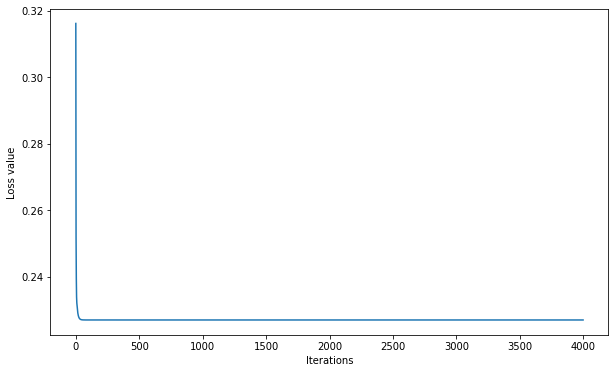

In [ ]:
# plot
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(iteration)), loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

In [ ]:
# Set the theta
init_theta = np.zeros((10,10))
for i in range(10) :
  for j in range(10) :
    init_theta[j,i] = random.uniform(1e-1,2e-1)

init_theta

array([[0.11577806, 0.13673755, 0.11620745, 0.11504881, 0.14641975,
        0.17568129, 0.12604608, 0.10832476, 0.12309584, 0.16582497],
       [0.11489435, 0.19678419, 0.17742107, 0.14430922, 0.16160654,
        0.15774797, 0.10779051, 0.18920069, 0.14673045, 0.14125863],
       [0.11138833, 0.14366378, 0.16332828, 0.16876222, 0.1591364 ,
        0.16165535, 0.18007682, 0.12938744, 0.16798243, 0.15652168],
       [0.19716164, 0.16009127, 0.13318581, 0.11170808, 0.19804675,
        0.12114674, 0.10075135, 0.18787659, 0.17499162, 0.19968722],
       [0.11019005, 0.17278639, 0.1142757 , 0.12364748, 0.11158329,
        0.10163056, 0.11819873, 0.1679147 , 0.17731001, 0.18904346],
       [0.1083806 , 0.11506604, 0.11361429, 0.13445826, 0.16612054,
        0.18678548, 0.1890908 , 0.1640649 , 0.19284755, 0.18193967],
       [0.12866825, 0.10545458, 0.17018818, 0.19971857, 0.1367034 ,
        0.18873734, 0.17854228, 0.19958197, 0.14899273, 0.10120165],
       [0.13924044, 0.13020147, 0.1015051

In [ ]:
theta = init_theta.reshape(100,1)

In [37]:
x1_min, x1_max = x1_train.min(), x1_train.max()    # min and max of grade 1
x2_min, x2_max = x2_train.min(), x2_train.max()    # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min,x1_max), np.linspace(x2_min,x2_max))               # create meshgrid

In [87]:
# mershgrid
xx11, xx22 = np.meshgrid(np.linspace(-2,3,50),np.linspace(-1.1,1.1,50))
XX_train = np.ones((xx11.shape[0],xx22.shape[0],100))
t = 0
for i in range(10) :
  for j in range(10) :
    XX_train[:,:,t] = (xx11**j) * (xx22**i)
    
    t = t+1

XX_train.shape

(50, 50, 100)

In [123]:
# run gradient descent algorithm TRAINING
start = time.time()
w_init = np.zeros(10)[:,None]
tau = 1
iteration = 4000
lamb = 1e-5
theta2, loss_history, coef_history = grad_desc(X, y_train , theta, tau, lamb, iteration)

print('TIME=',time.time()-start)
print(loss_history[-1])
#print(coef_history[-1].reshape(100,1))

theta_train = coef_history[-1][:,None]


traintrain = pls_pred(XX_train,theta_train)
traintrain = traintrain.reshape(xx11.shape)

theta_train[:5]

TIME= 0.3657419681549072
0.0640610747127441


In [124]:
theta_train = coef_history[-1][:,None]
theta_train[:5]

array([[ 5.20442405],
       [ 4.72385978],
       [-8.62119365],
       [-1.92027242],
       [-2.95533821]])

In [125]:
traintrain = pls_pred(XX_train,theta_train)
traintrain = traintrain.reshape(xx11.shape)
traintrain.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


(50, 50)

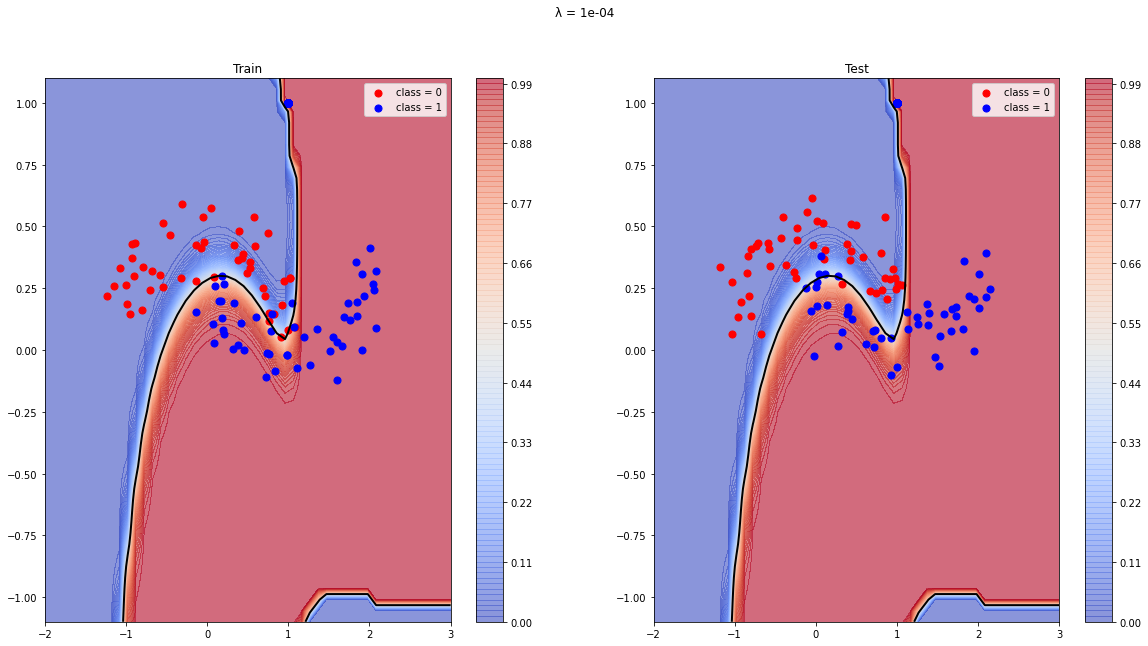

In [126]:
plt.figure(figsize=(20,10))
plt.suptitle('λ = 1e-04')
plt.subplot(1,2,1)

ax1 = plt.contourf(xx11,xx22,traintrain,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax1)
cbar.update_ticks()

plt.scatter(x1_train[idx_class0_train],x2_train[idx_class0_train], s=50, c='r', label ='class = 0')
plt.scatter(x1_train[idx_class1_train],x2_train[idx_class1_train], c='blue', s=50, label = 'class = 1')
plt.contour(xx11,xx22, traintrain,levels=[0.5], linewidths=2, colors='k',)
#plt.xlim(x1_min,x1_max)
#plt.ylim(x2_min,x2_max)
plt.legend(loc='best')
plt.title('Train')

plt.subplot(1,2,2)

ax2 = plt.contourf(xx11,xx22,traintrain,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax2)
cbar.update_ticks()


plt.scatter(x1_test[idx_class0_test],x2_test[idx_class0_test], s=50, c='r', label ='class = 0')
plt.scatter(x1_test[idx_class1_test],x2_test[idx_class1_test], c='blue', s=50, label = 'class = 1')
plt.contour(xx11,xx22, traintrain,levels=[0.5], linewidths=2, colors='k',)

plt.legend(loc='best')
plt.title('Test')

plt.show()

In [47]:
xx1[:5,:10]

array([[-1.2278    , -1.16016816, -1.09253633, -1.02490449, -0.95727265,
        -0.88964082, -0.82200898, -0.75437714, -0.68674531, -0.61911347],
       [-1.2278    , -1.16016816, -1.09253633, -1.02490449, -0.95727265,
        -0.88964082, -0.82200898, -0.75437714, -0.68674531, -0.61911347],
       [-1.2278    , -1.16016816, -1.09253633, -1.02490449, -0.95727265,
        -0.88964082, -0.82200898, -0.75437714, -0.68674531, -0.61911347],
       [-1.2278    , -1.16016816, -1.09253633, -1.02490449, -0.95727265,
        -0.88964082, -0.82200898, -0.75437714, -0.68674531, -0.61911347],
       [-1.2278    , -1.16016816, -1.09253633, -1.02490449, -0.95727265,
        -0.88964082, -0.82200898, -0.75437714, -0.68674531, -0.61911347]])

In [38]:
X_train = np.ones((xx1.shape[0],xx2.shape[0],100))

In [56]:
h=0
for i in range(10) :
  for j in range(10) :
    X_train[:,:,h] = (xx1**j) * (xx2**i)
    
    h = h+1

X_train.shape

(50, 50, 100)

In [40]:
theta_train = coef_history[-1][:,None]

In [41]:
train = pls_pred(X_train,theta_train)
train = train.reshape(xx1.shape)
train.shape

(50, 50)

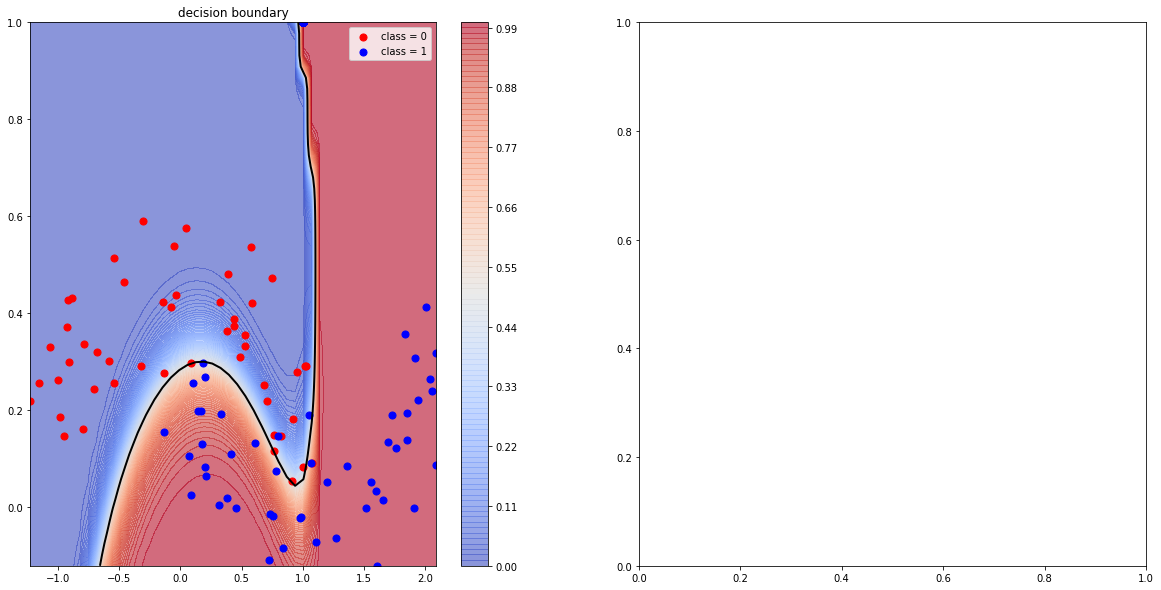

In [42]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)

ax = plt.contourf(xx1,xx2,train,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax)
cbar.update_ticks()

plt.scatter(x1_train[idx_class0_train],x2_train[idx_class0_train], s=50, c='r', label ='class = 0')
plt.scatter(x1_train[idx_class1_train],x2_train[idx_class1_train], c='blue', s=50, label = 'class = 1')
plt.contour(xx1,xx2, train,levels=[0.5], linewidths=2, colors='k',)
plt.xlim(x1_min,x1_max)
plt.ylim(x2_min,x2_max)
plt.legend(loc='best')
plt.title('decision boundary')

plt.subplot(1,2,2)
plt.show()

In [ ]:
lamb0e1_pred_train = pls_pred(X,theta_train)
lamb0e1_pred_train[:2]

In [ ]:
lamb0e2_pred_train = pls_pred(X,theta_train)
lamb0e2_pred_train[:2]

In [ ]:
lamb0e3_pred_train = pls_pred(X,theta_train)
lamb0e3_pred_train[:2]

In [ ]:
lamb0e4_pred_train = pls_pred(X,theta_train)
lamb0e4_pred_train[:2]

In [ ]:
lamb0e5_pred_train = pls_pred(X,theta_train)
lamb0e5_pred_train[:2]

In [ ]:
lamb0e1_pred_train[lamb0e1_pred_train >= 0.5] = 1
lamb0e1_pred_train[lamb0e1_pred_train  < 0.5] = 0
correct1 = np.sum(lamb0e1_pred_train==y_train)
acc1 = correct1 / 200 * 100
print(acc1)

In [ ]:
lamb0e2_pred_train[lamb0e2_pred_train >= 0.5] = 1
lamb0e2_pred_train[lamb0e2_pred_train  < 0.5] = 0
correct2 = np.sum(lamb0e2_pred_train==y_train)
acc2 = correct2 / 200 * 100
print(acc2)

In [ ]:
lamb0e3_pred_train[lamb0e3_pred_train >= 0.5] = 1
lamb0e3_pred_train[lamb0e3_pred_train  < 0.5] = 0
correct3 = np.sum(lamb0e3_pred_train==y_train)
acc3 = correct3 / 200 * 100
print(acc3)

In [ ]:
lamb0e4_pred_train[lamb0e4_pred_train >= 0.5] = 1
lamb0e4_pred_train[lamb0e4_pred_train  < 0.5] = 0
correct4 = np.sum(lamb0e4_pred_train==y_train)
acc4 = correct4 / 200 * 100
print(acc4)

In [ ]:
lamb0e5_pred_train[lamb0e5_pred_train >= 0.5] = 1
lamb0e5_pred_train[lamb0e5_pred_train  < 0.5] = 0
correct5 = np.sum(lamb0e5_pred_train==y_train)
acc5 = correct5 / 200 * 100
print(acc5)

In [ ]:
lamb0e1_pred_test = pls_pred(X2,theta_train)
lamb0e1_pred_test[:2]
lamb0e2_pred_test = pls_pred(X2,theta_train)
lamb0e2_pred_test[:2]
lamb0e3_pred_test = pls_pred(X2,theta_train)
lamb0e3_pred_test[:2]
lamb0e4_pred_test = pls_pred(X2,theta_train)
lamb0e4_pred_test[:2]
lamb0e5_pred_test = pls_pred(X2,theta_train)
lamb0e5_pred_test[:2]
lamb0e1_pred_test[lamb0e1_pred_test >= 0.5] = 1
lamb0e1_pred_test[lamb0e1_pred_test  < 0.5] = 0
correct12 = np.sum(lamb0e1_pred_test==y_test)
acc12 = correct12 / 200 * 100
print(acc12)
lamb0e2_pred_test[lamb0e2_pred_test >= 0.5] = 1
lamb0e2_pred_test[lamb0e2_pred_test  < 0.5] = 0
correct22 = np.sum(lamb0e2_pred_test==y_test)
acc22 = correct22 / 200 * 100
print(acc22)
lamb0e5_pred_test[lamb0e5_pred_test >= 0.5] = 1
lamb0e5_pred_test[lamb0e5_pred_test  < 0.5] = 0
correct52 = np.sum(lamb0e5_pred_test==y_test)
acc52 = correct52 / 200 * 100
print(acc52)

#OUTPUT

1. Plot the training data

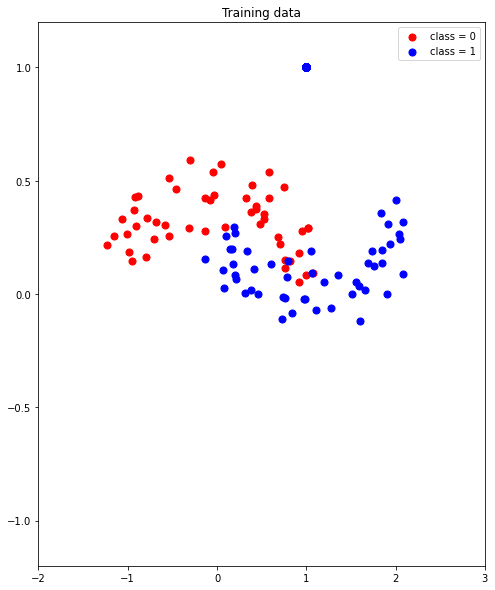

In [ ]:
plt.figure(1,figsize=(8,10))
plt.scatter(x1_train[idx_class0_train],x2_train[idx_class0_train], s=50, c='r', label ='class = 0')
plt.scatter(x1_train[idx_class1_train],x2_train[idx_class1_train], c='blue', s=50, label = 'class = 1')
plt.title('Training data')
plt.legend(loc='best')
plt.xlim(-2,3)
plt.ylim(-1.2,1.2)
plt.show()

2. Plot the test data

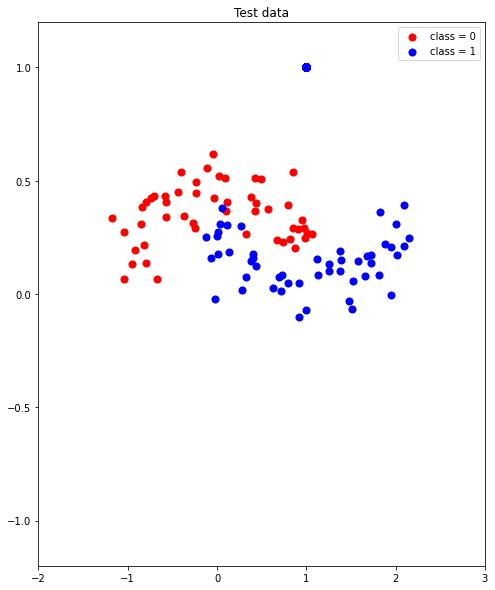

In [ ]:
plt.figure(1,figsize=(8,10))
plt.scatter(x1_test[idx_class0_test],x2_test[idx_class0_test], s=50, c='r', label ='class = 0')
plt.scatter(x1_test[idx_class1_test],x2_test[idx_class1_test], c='blue', s=50, label = 'class = 1')
plt.title('Test data')
plt.legend(loc='best')
plt.xlim(-2,3)
plt.ylim(-1.2,1.2)
plt.show()

3. Plot the  learning curve with λ=0.00001

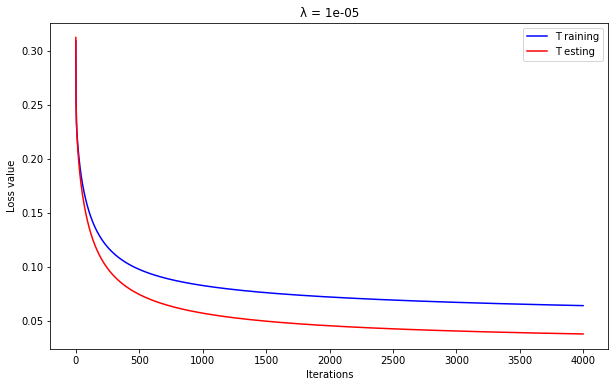

In [ ]:
# plot
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(iteration)), loss_history, color="blue",label = "T raining")
plt.plot(np.array(range(iteration)), loss_history2, color="red", label = "T esting")
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.legend(loc='best')
plt.title("λ = 1e-05")
plt.show()

4. Plot the  learning curve with λ=0.0001

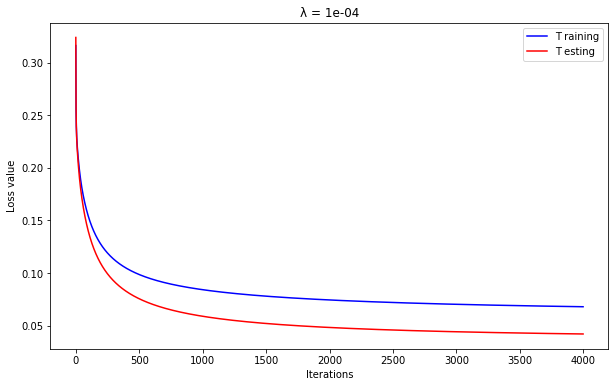

In [ ]:
# plot
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(iteration)), loss_history, color="blue",label = "T raining")
plt.plot(np.array(range(iteration)), loss_history2, color="red", label = "T esting")
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.legend(loc='best')
plt.title("λ = 1e-04")
plt.show()

5. Plot the  learning curve with λ=0.001

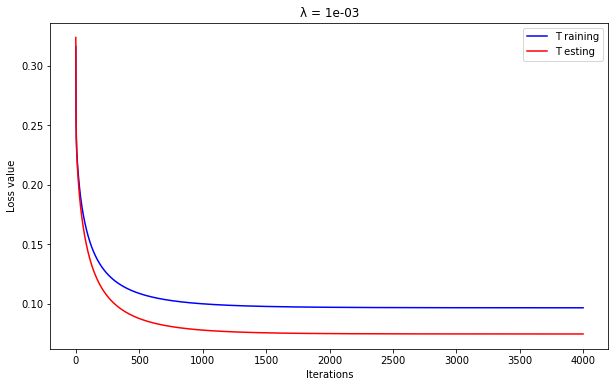

In [ ]:
# plot
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(iteration)), loss_history, color="blue",label = "T raining")
plt.plot(np.array(range(iteration)), loss_history2, color="red", label = "T esting")
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.legend(loc='best')
plt.title("λ = 1e-03")
plt.show()

6. Plot the  learning curve with λ=0.01

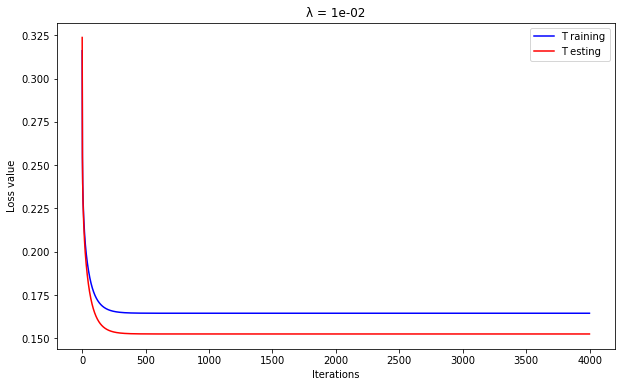

In [ ]:
# plot
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(iteration)), loss_history, color="blue",label = "T raining")
plt.plot(np.array(range(iteration)), loss_history2, color="red", label = "T esting")
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.legend(loc='best')
plt.title("λ = 1e-02")
plt.show()

7. Plot the  learning curve with λ=0.1

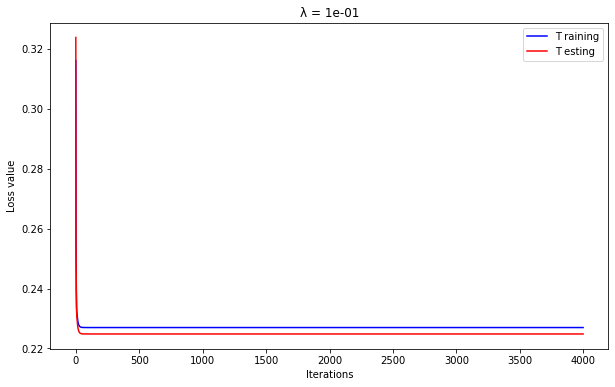

In [ ]:
# plot
plt.figure(3, figsize=(10,6))
plt.plot(np.array(range(iteration)), loss_history, color="blue",label = "T raining")
plt.plot(np.array(range(iteration)), loss_history2, color="red", label = "T esting")
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.legend(loc='best')
plt.title("λ = 1e-01")
plt.show()

*8*.Plot the probability map of the obtained classifier with λ=0.00001

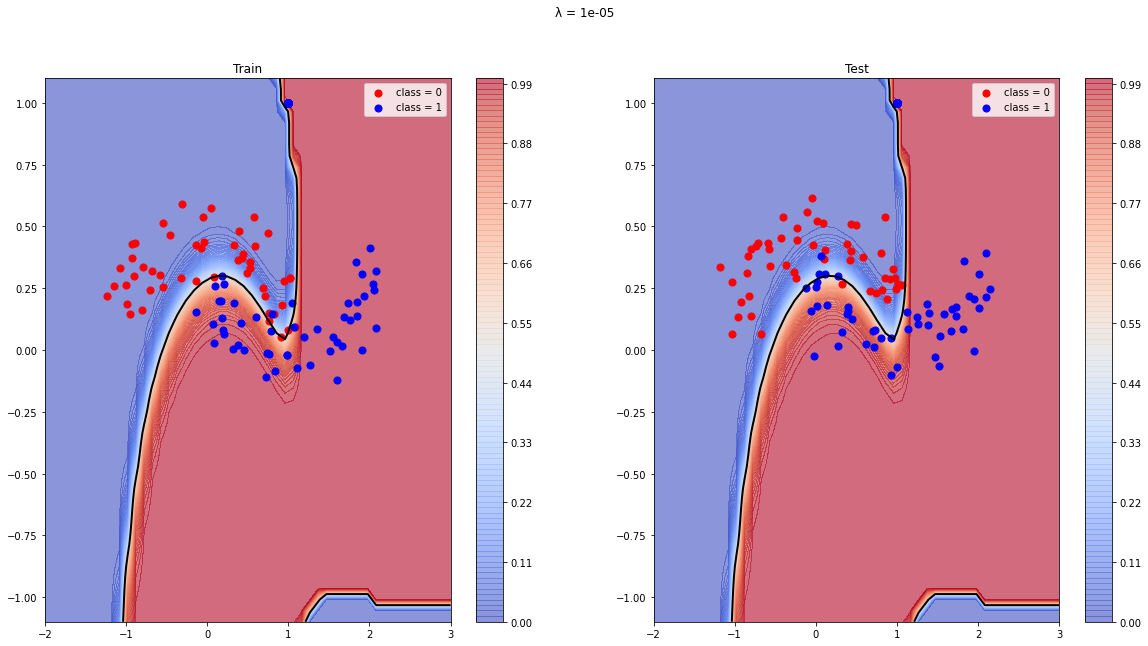

In [101]:
plt.figure(figsize=(20,10))
plt.suptitle('λ = 1e-05')
plt.subplot(1,2,1)

ax1 = plt.contourf(xx11,xx22,traintrain,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax1)
cbar.update_ticks()

plt.scatter(x1_train[idx_class0_train],x2_train[idx_class0_train], s=50, c='r', label ='class = 0')
plt.scatter(x1_train[idx_class1_train],x2_train[idx_class1_train], c='blue', s=50, label = 'class = 1')
plt.contour(xx11,xx22, traintrain,levels=[0.5], linewidths=2, colors='k',)
#plt.xlim(x1_min,x1_max)
#plt.ylim(x2_min,x2_max)
plt.legend(loc='best')
plt.title('Train')

plt.subplot(1,2,2)

ax2 = plt.contourf(xx11,xx22,traintrain,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax2)
cbar.update_ticks()


plt.scatter(x1_test[idx_class0_test],x2_test[idx_class0_test], s=50, c='r', label ='class = 0')
plt.scatter(x1_test[idx_class1_test],x2_test[idx_class1_test], c='blue', s=50, label = 'class = 1')
plt.contour(xx11,xx22, traintrain,levels=[0.5], linewidths=2, colors='k',)

plt.legend(loc='best')
plt.title('Test')

plt.show()

9.Plot the probability map of the obtained classifier with λ=0.0001

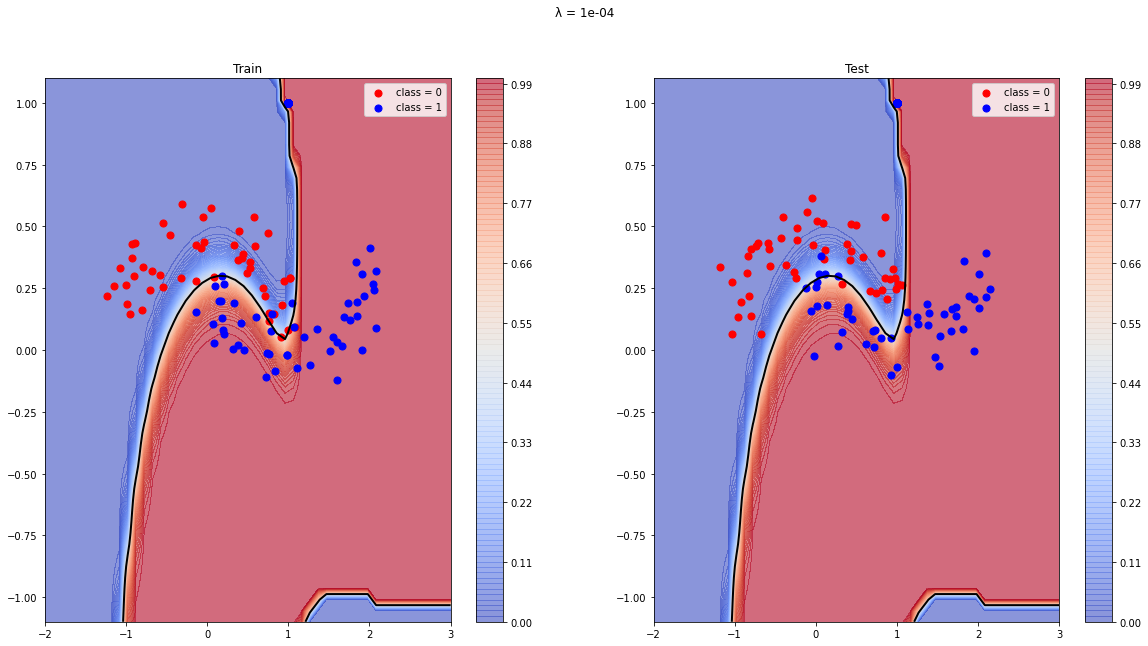

In [127]:
plt.figure(figsize=(20,10))
plt.suptitle('λ = 1e-04')
plt.subplot(1,2,1)

ax1 = plt.contourf(xx11,xx22,traintrain,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax1)
cbar.update_ticks()

plt.scatter(x1_train[idx_class0_train],x2_train[idx_class0_train], s=50, c='r', label ='class = 0')
plt.scatter(x1_train[idx_class1_train],x2_train[idx_class1_train], c='blue', s=50, label = 'class = 1')
plt.contour(xx11,xx22, traintrain,levels=[0.5], linewidths=2, colors='k',)
#plt.xlim(x1_min,x1_max)
#plt.ylim(x2_min,x2_max)
plt.legend(loc='best')
plt.title('Train')

plt.subplot(1,2,2)

ax2 = plt.contourf(xx11,xx22,traintrain,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax2)
cbar.update_ticks()


plt.scatter(x1_test[idx_class0_test],x2_test[idx_class0_test], s=50, c='r', label ='class = 0')
plt.scatter(x1_test[idx_class1_test],x2_test[idx_class1_test], c='blue', s=50, label = 'class = 1')
plt.contour(xx11,xx22, traintrain,levels=[0.5], linewidths=2, colors='k',)

plt.legend(loc='best')
plt.title('Test')

plt.show()

10.Plot the probability map of the obtained classifier with λ=0.001

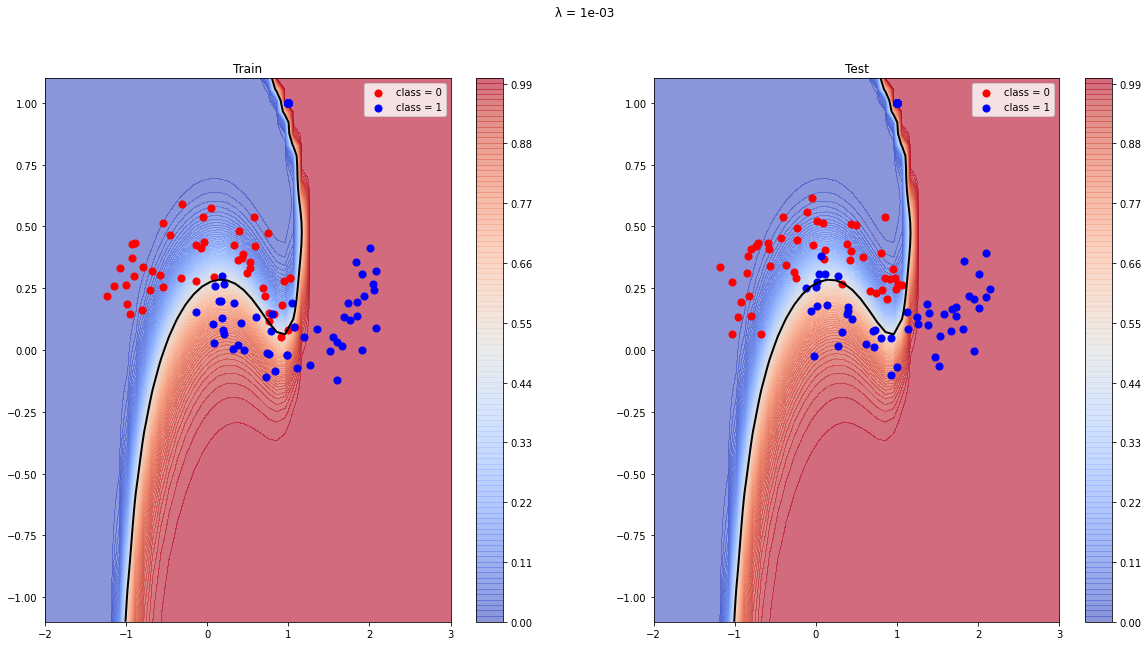

In [129]:
plt.figure(figsize=(20,10))
plt.suptitle('λ = 1e-03')
plt.subplot(1,2,1)

ax1 = plt.contourf(xx11,xx22,traintrain,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax1)
cbar.update_ticks()

plt.scatter(x1_train[idx_class0_train],x2_train[idx_class0_train], s=50, c='r', label ='class = 0')
plt.scatter(x1_train[idx_class1_train],x2_train[idx_class1_train], c='blue', s=50, label = 'class = 1')
plt.contour(xx11,xx22, traintrain,levels=[0.5], linewidths=2, colors='k',)
#plt.xlim(x1_min,x1_max)
#plt.ylim(x2_min,x2_max)
plt.legend(loc='best')
plt.title('Train')

plt.subplot(1,2,2)

ax2 = plt.contourf(xx11,xx22,traintrain,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax2)
cbar.update_ticks()


plt.scatter(x1_test[idx_class0_test],x2_test[idx_class0_test], s=50, c='r', label ='class = 0')
plt.scatter(x1_test[idx_class1_test],x2_test[idx_class1_test], c='blue', s=50, label = 'class = 1')
plt.contour(xx11,xx22, traintrain,levels=[0.5], linewidths=2, colors='k',)

plt.legend(loc='best')
plt.title('Test')

plt.show()

11.Plot the probability map of the obtained classifier with λ=0.01

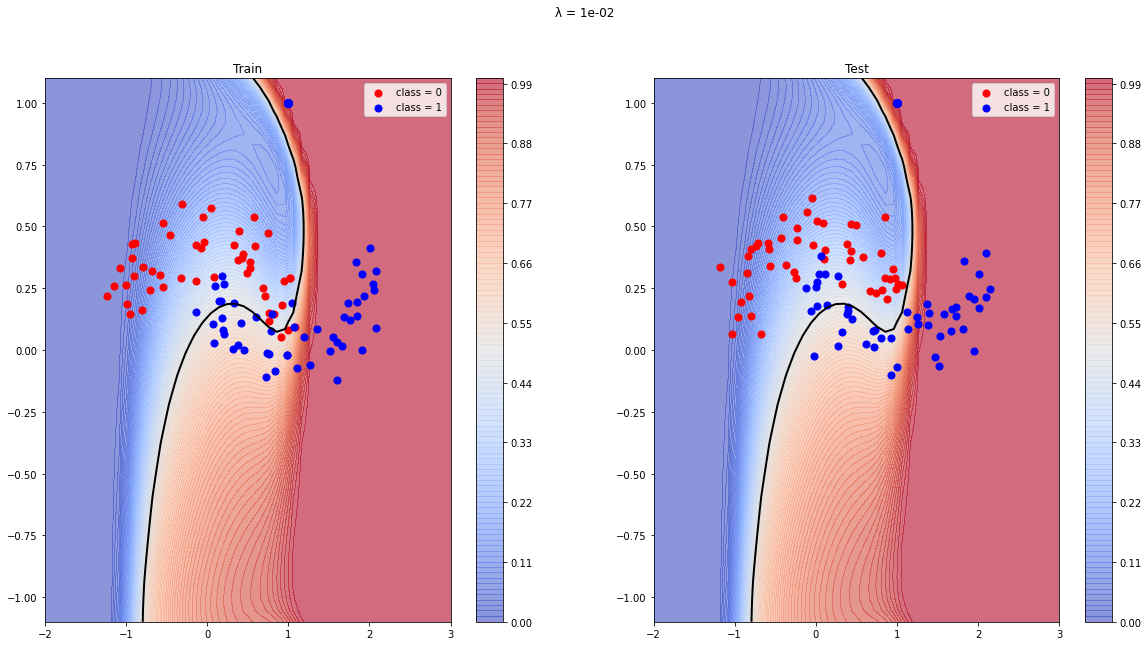

In [133]:
plt.figure(figsize=(20,10))
plt.suptitle('λ = 1e-02')
plt.subplot(1,2,1)

ax1 = plt.contourf(xx11,xx22,traintrain,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax1)
cbar.update_ticks()

plt.scatter(x1_train[idx_class0_train],x2_train[idx_class0_train], s=50, c='r', label ='class = 0')
plt.scatter(x1_train[idx_class1_train],x2_train[idx_class1_train], c='blue', s=50, label = 'class = 1')
plt.contour(xx11,xx22, traintrain,levels=[0.5], linewidths=2, colors='k',)
#plt.xlim(x1_min,x1_max)
#plt.ylim(x2_min,x2_max)
plt.legend(loc='best')
plt.title('Train')

plt.subplot(1,2,2)

ax2 = plt.contourf(xx11,xx22,traintrain,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax2)
cbar.update_ticks()


plt.scatter(x1_test[idx_class0_test],x2_test[idx_class0_test], s=50, c='r', label ='class = 0')
plt.scatter(x1_test[idx_class1_test],x2_test[idx_class1_test], c='blue', s=50, label = 'class = 1')
plt.contour(xx11,xx22, traintrain,levels=[0.5], linewidths=2, colors='k',)

plt.legend(loc='best')
plt.title('Test')

plt.show()

12.Plot the probability map of the obtained classifier with λ=0.1

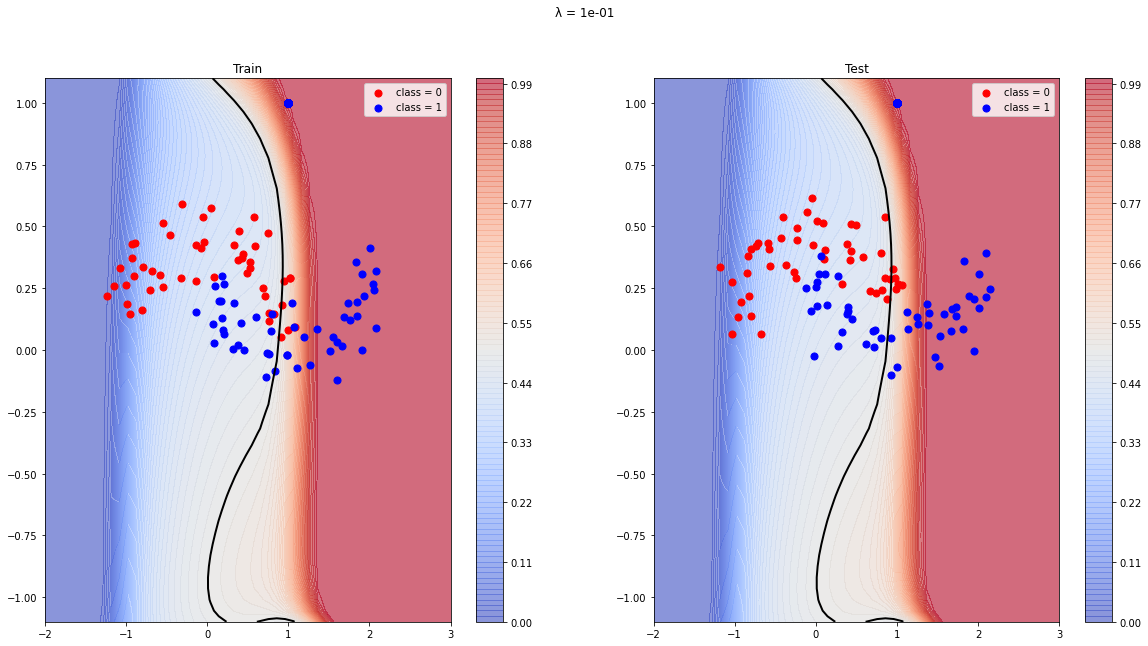

In [135]:
plt.figure(figsize=(20,10))
plt.suptitle('λ = 1e-01')
plt.subplot(1,2,1)

ax1 = plt.contourf(xx11,xx22,traintrain,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax1)
cbar.update_ticks()

plt.scatter(x1_train[idx_class0_train],x2_train[idx_class0_train], s=50, c='r', label ='class = 0')
plt.scatter(x1_train[idx_class1_train],x2_train[idx_class1_train], c='blue', s=50, label = 'class = 1')
plt.contour(xx11,xx22, traintrain,levels=[0.5], linewidths=2, colors='k',)
#plt.xlim(x1_min,x1_max)
#plt.ylim(x2_min,x2_max)
plt.legend(loc='best')
plt.title('Train')

plt.subplot(1,2,2)

ax2 = plt.contourf(xx11,xx22,traintrain,100,vmin=0,vmax=1,cmap='coolwarm', alpha=0.6)
cbar = plt.colorbar(ax2)
cbar.update_ticks()


plt.scatter(x1_test[idx_class0_test],x2_test[idx_class0_test], s=50, c='r', label ='class = 0')
plt.scatter(x1_test[idx_class1_test],x2_test[idx_class1_test], c='blue', s=50, label = 'class = 1')
plt.contour(xx11,xx22, traintrain,levels=[0.5], linewidths=2, colors='k',)

plt.legend(loc='best')
plt.title('Test')

plt.show()

In [138]:
print(X.shape)  #x_train
print(X2.shape) #x_test

(200, 100)
(200, 100)


13. Print the final training accuracy with the given regularization parameters

In [164]:
print('λ = 1e-05, Training Accuracy (%) = ',acc5)
print('λ = 1e-04, Training Accuracy (%) = ',acc4)
print('λ = 1e-03, Training Accuracy (%) = ',acc3)
print('λ = 1e-02, Training Accuracy (%) = ',acc2)
print('λ = 1e-01, Training Accuracy (%) = ',acc1)

λ = 1e-05, Training Accuracy (%) =  98.5
λ = 1e-04, Training Accuracy (%) =  98.5
λ = 1e-03, Training Accuracy (%) =  97.5
λ = 1e-02, Training Accuracy (%) =  94.0
λ = 1e-01, Training Accuracy (%) =  85.5


14. Print the final testing accuracy with the given regularization parameters

In [211]:
print('λ = 1e-05, Testing Accuracy (%) = ',acc52)
print('λ = 1e-04, Testing Accuracy (%) = ',acc42)
print('λ = 1e-03, Testing Accuracy (%) = ',acc32)
print('λ = 1e-02, Testing Accuracy (%) = ',acc22)
print('λ = 1e-01, Testing Accuracy (%) = ',acc12)

λ = 1e-05, Testing Accuracy (%) =  97.0
λ = 1e-04, Testing Accuracy (%) =  97.0
λ = 1e-03, Testing Accuracy (%) =  96.5
λ = 1e-02, Testing Accuracy (%) =  95.0
λ = 1e-01, Testing Accuracy (%) =  86.5
